In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML_IITG/Logistic_Regression/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
new_df = df[["age",'sex','trestbps','chol','thalach','oldpeak','target']]
new_df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target
0,63,1,145,233,150,2.3,1
1,37,1,130,250,187,3.5,1
2,41,0,130,204,172,1.4,1
3,56,1,120,236,178,0.8,1
4,57,0,120,354,163,0.6,1


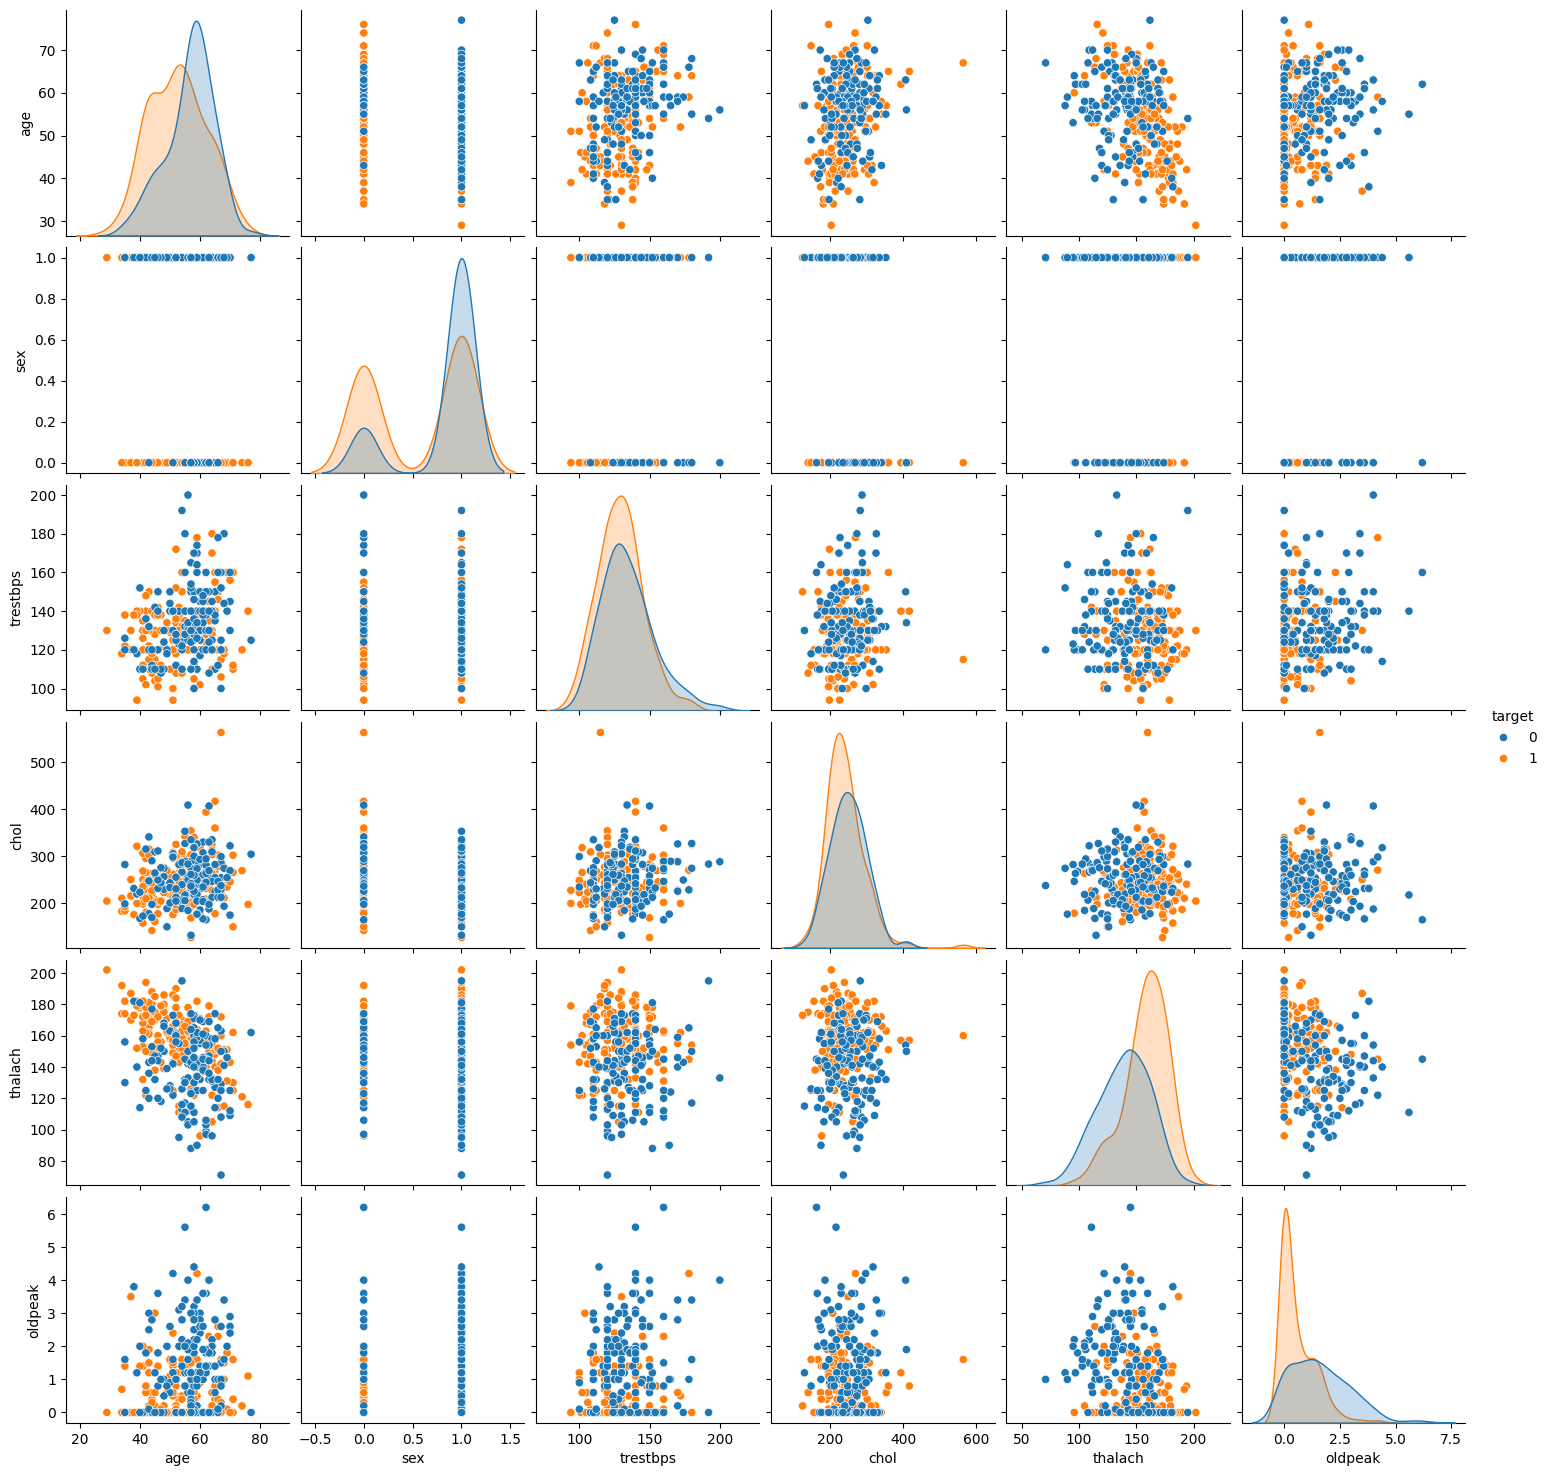

In [40]:
sns.pairplot(new_df,hue="target")

In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(302, 14)

In [72]:
new_df.corr()

,age,sex,trestbps,chol,thalach,oldpeak,target
age,1.000000,-0.094962,0.283121,0.207216,-0.395235,0.206040,-0.221476
sex,-0.094962,1.000000,-0.057647,-0.195571,-0.046439,0.098322,-0.283609
trestbps,0.283121,-0.057647,1.000000,0.125256,-0.048023,0.194600,-0.146269
chol,0.207216,-0.195571,0.125256,1.000000,-0.005308,0.050086,-0.081437
thalach,-0.395235,-0.046439,-0.048023,-0.005308,1.000000,-0.342201,0.419955
oldpeak,0.206040,0.098322,0.194600,0.050086,-0.342201,1.000000,-0.429146
target,-0.221476,-0.283609,-0.146269,-0.081437,0.419955,-0.429146,1.000000


In [41]:
X = new_df.drop("target",axis=1)
y = new_df["target"]

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [44]:
sc = StandardScaler()
x_tr_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_tr_sc,y_train)
model

LogisticRegression()

In [46]:
y_pred = model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [47]:
model.coef_

array([[-0.18777101, -0.6445049 , -0.00537888, -0.26144728,  0.65195426,
        -0.94675502]])

In [48]:
coef = pd.Series(model.coef_[0],index=X.columns)
coef

,0
age,-0.187771
sex,-0.644505
trestbps,-0.005379
chol,-0.261447
thalach,0.651954
oldpeak,-0.946755


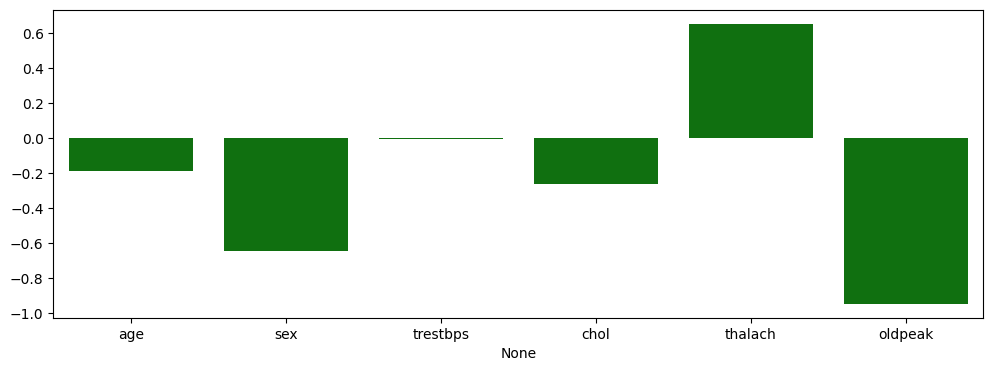

In [49]:
plt.figure(figsize=(12,4))
sns.barplot(x=coef.index,y=coef.values,color="green")
plt.show()

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,RocCurveDisplay,classification_report

In [51]:
acc = accuracy_score(y_test,y_pred)
acc

0.6263736263736264

In [59]:
y_prob = model.predict_proba(x_test_sc)[:,1]

In [68]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


<Figure size 800x400 with 0 Axes>

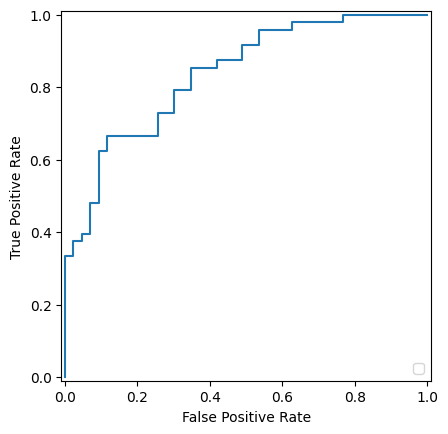

In [71]:
plt.figure(figsize=(8,4))
RocCurveDisplay(tpr=tpr,fpr=fpr).plot()
plt.show()

In [63]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[12, 31],
       [ 3, 45]])

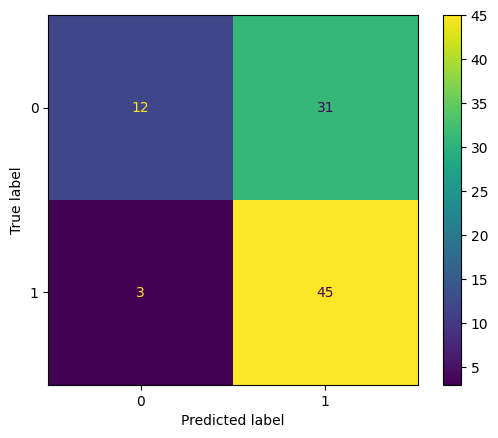

In [64]:
ConfusionMatrixDisplay(conf).plot()

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.28      0.41        43
           1       0.59      0.94      0.73        48

    accuracy                           0.63        91
   macro avg       0.70      0.61      0.57        91
weighted avg       0.69      0.63      0.58        91

